<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/Class_16_20220420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(train_input, train_target),(test_input, test_target)= keras.datasets.fashion_mnist.load_data()

print(train_input.shape)
print(test_input.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
train_scaled_pre = (train_input/255.0).reshape(-1,28,28, 1)  # 1 흑백을 의미 (3 은 컬러)
test_scaled = (test_input/255.0).reshape(-1,28,28, 1)

In [5]:
print(train_scaled_pre.shape)

(60000, 28, 28, 1)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_scaled , val_scaled, train_target, val_target = train_test_split(
    train_scaled_pre, train_target, test_size = 0.2, random_state =1
)

print(train_scaled.shape)
print(val_scaled.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [10]:
model = keras.Sequential()
## conv1
model.add(keras.layers.Conv2D(filters = 64, kernel_size =3, # filter(도장개수), kernel_size(3*3)
                              activation = 'relu', padding = 'same', #zero padding (주변에 0(검은색)으로 둘러싸서 자기자신이 나옴)

                              strides = 1, input_shape = (28,28,1))) #1칸 움직이기/자료 모양
model.add(keras.layers.MaxPool2D(pool_size =2)) #maxpooling

## conv2 
model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3,
                              activation = 'relu', padding = 'same'
                              strides = 2))
model.add(keras.layers.MaxPool2D(pool_size =2))



model.add(keras.layers.Flatten()) #일렬로 데이터펴기
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               1254500   
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
____________________________________________

In [13]:
!pip install pydot

In [14]:
!pip install graphviz

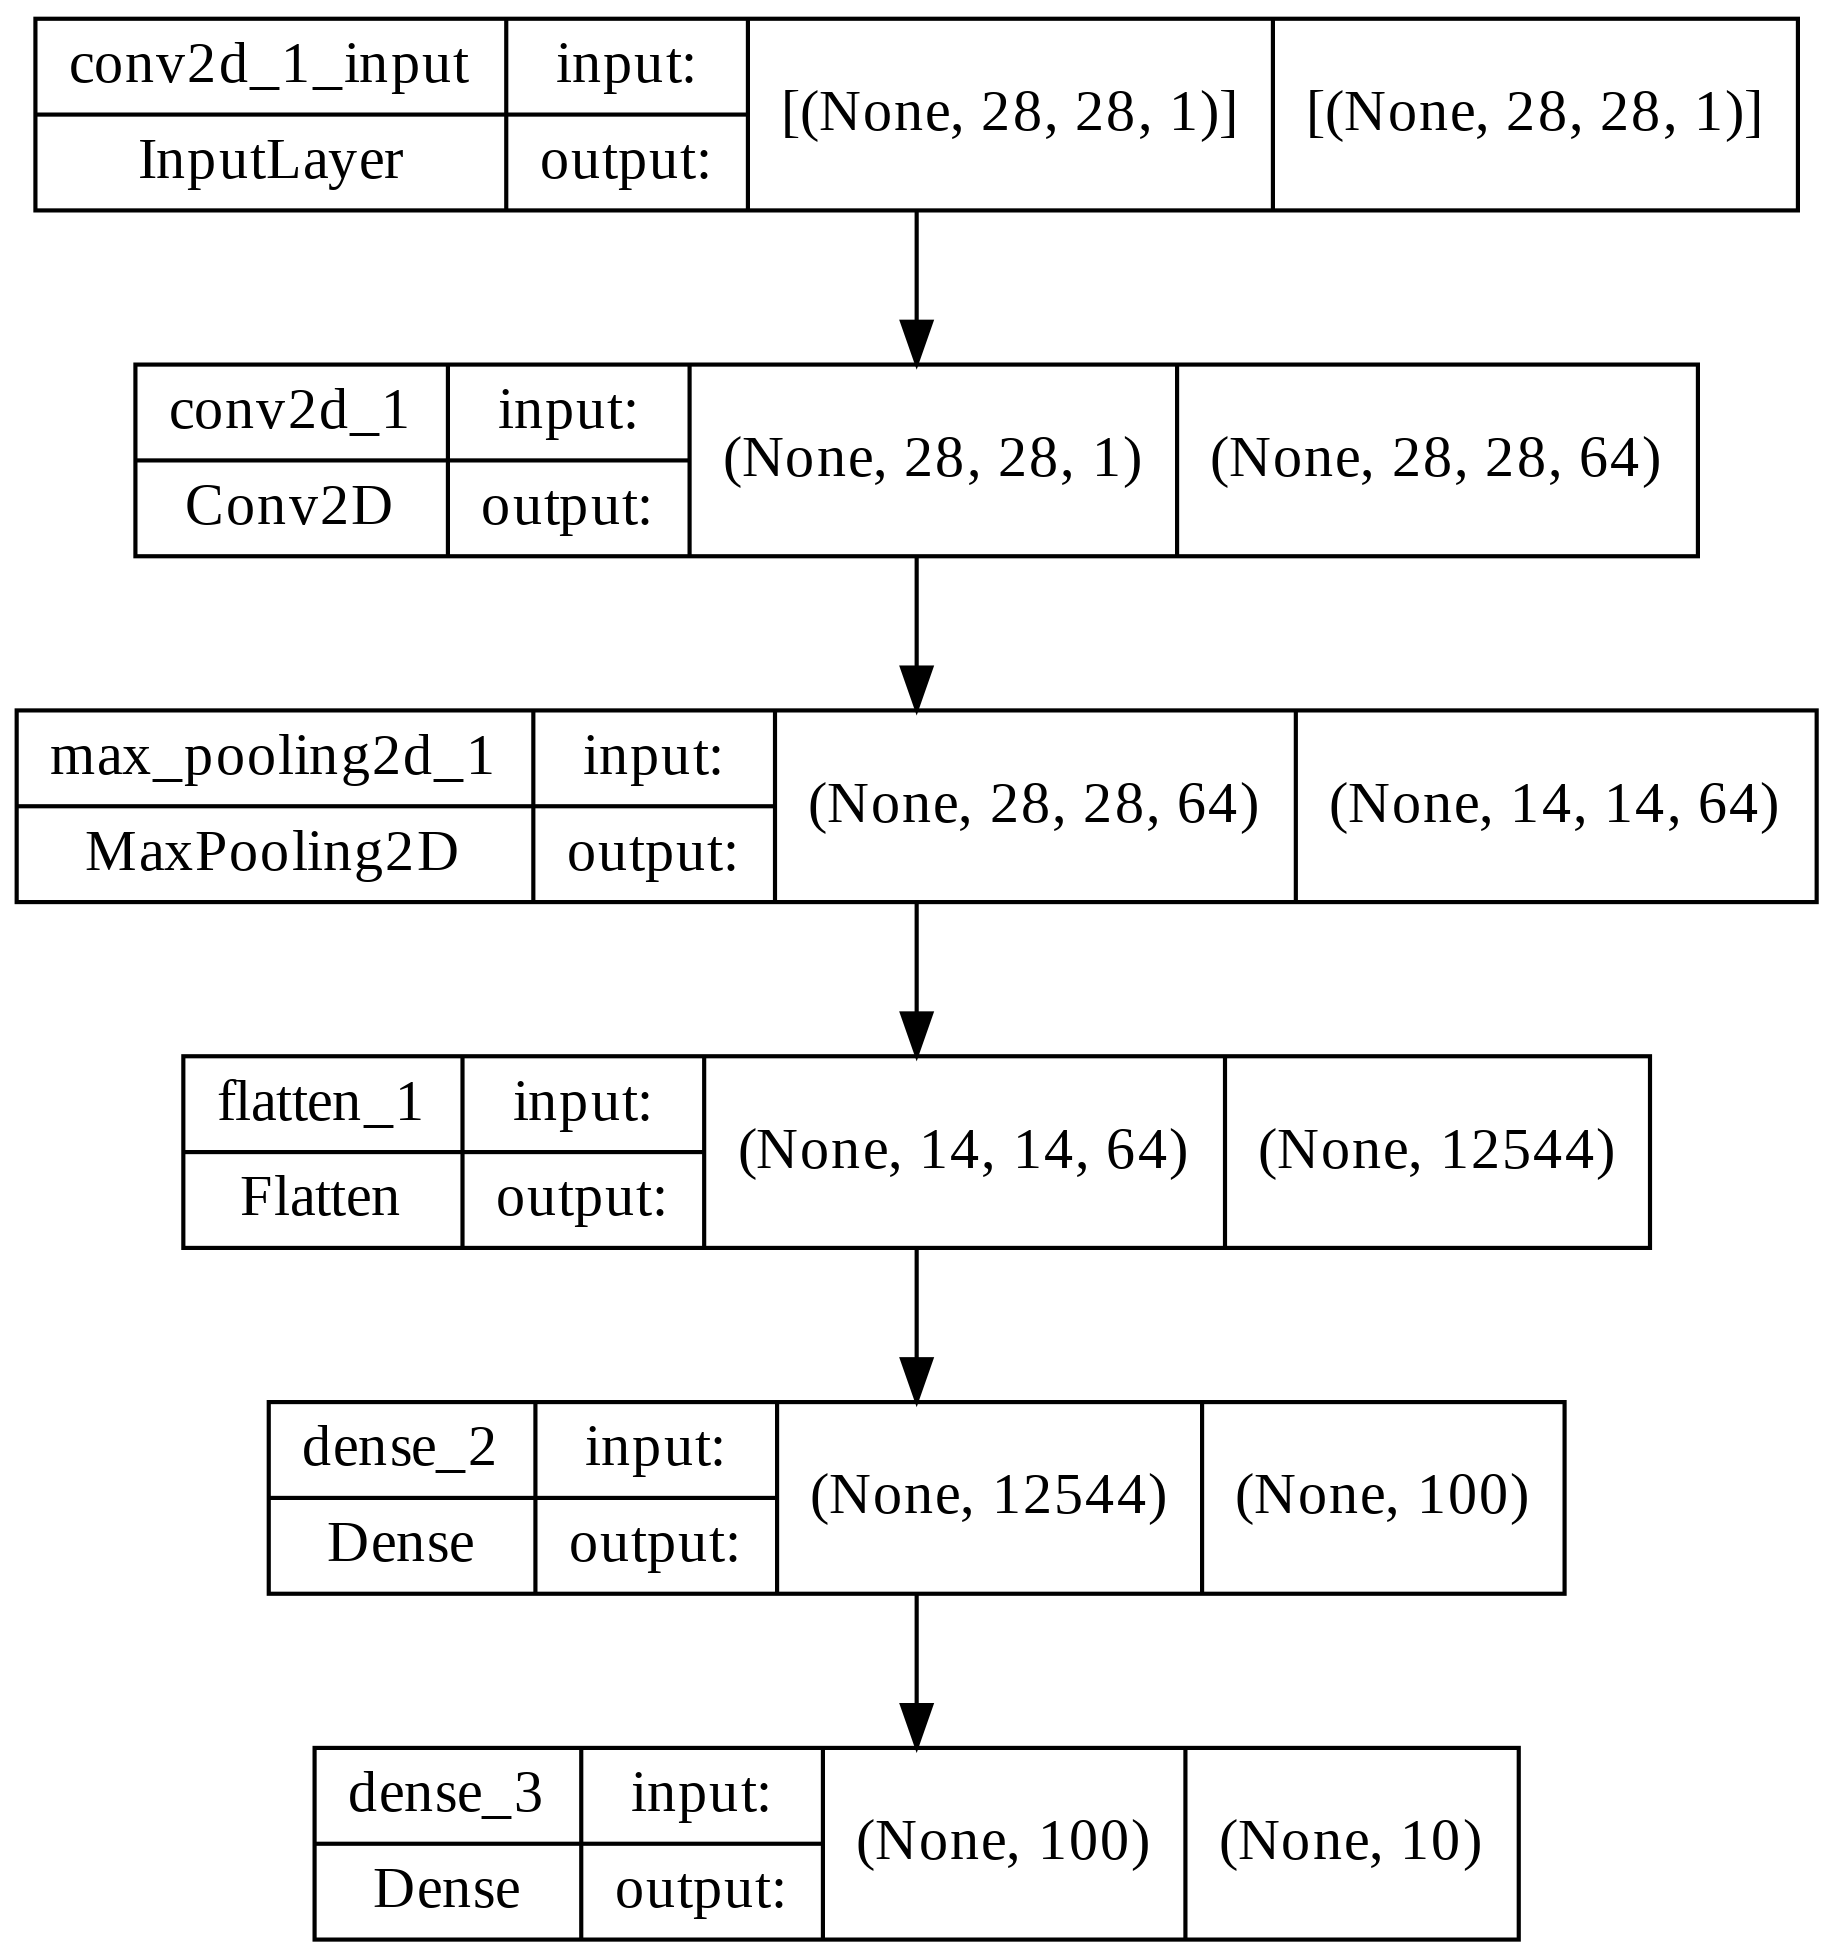

In [15]:
keras.utils.plot_model(model, show_shapes = True,
                       to_file = 'cnn.png', dpi = 300)

In [16]:
import os
if not os.path.exists('./model/'):
  os.mkdir('./model/')

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

checkpoint = keras.callbacks.ModelCheckpoint('./model/best_cnn_model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')

history = model.fit(train_scaled , train_target, epochs = 10,
                    validation_data =(val_scaled, val_target),
                    batch_size = 50, callbacks = [checkpoint,])

Epoch 1/10
960/960 [==============================] - 47s 48ms/step - loss: 0.0614 - accuracy: 0.9787 - val_loss: 0.3129 - val_accuracy: 0.9156
Epoch 2/10
960/960 [==============================] - 45s 47ms/step - loss: 0.0525 - accuracy: 0.9815 - val_loss: 0.3806 - val_accuracy: 0.9052
Epoch 3/10
960/960 [==============================] - 46s 48ms/step - loss: 0.0445 - accuracy: 0.9847 - val_loss: 0.3416 - val_accuracy: 0.9183
Epoch 4/10
960/960 [==============================] - 45s 47ms/step - loss: 0.0355 - accuracy: 0.9882 - val_loss: 0.3832 - val_accuracy: 0.9127
Epoch 5/10
960/960 [==============================] - 45s 47ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.3946 - val_accuracy: 0.9129
Epoch 6/10
960/960 [==============================] - 53s 55ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.4015 - val_accuracy: 0.9121
Epoch 7/10
960/960 [==============================] - 45s 47ms/step - loss: 0.0260 - accuracy: 0.9913 - val_loss: 0.4498 - val_accuracy:

In [18]:
np.random.seed(0)
tf.random.set_seed(3)

In [21]:
(x_train, y_train),(x_test, y_test) =keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
x_train = (x_train/255.0).reshape(-1,28,28,1)
x_test = (x_test/255.0).reshape(-1,28,28,1)

print(x_train.shape)
print(x_train.dtype)
print(x_test.shape)

(60000, 28, 28, 1)
float64
(10000, 28, 28, 1)


In [25]:
model =keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu',
                              input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size =2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

In [27]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

checkpoint = keras.callbacks.ModelCheckpoint('./model/best_mnist_model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience =5)

history = model.fit(x_train, y_train, validation_data = (x_test, y_test),
                    epochs = 30, batch_size = 200,
                    callbacks = [checkpoint, early_stopping],
                    verbose = 1)

Epoch 1/30
300/300 [==============================] - 135s 446ms/step - loss: 1.1046 - accuracy: 0.6368 - val_loss: 0.3275 - val_accuracy: 0.9057
Epoch 2/30
300/300 [==============================] - 134s 445ms/step - loss: 0.3584 - accuracy: 0.8925 - val_loss: 0.2233 - val_accuracy: 0.9325
Epoch 3/30
300/300 [==============================] - 133s 443ms/step - loss: 0.2868 - accuracy: 0.9128 - val_loss: 0.1835 - val_accuracy: 0.9434
Epoch 4/30
300/300 [==============================] - 133s 443ms/step - loss: 0.2584 - accuracy: 0.9214 - val_loss: 0.1643 - val_accuracy: 0.9492
Epoch 5/30
300/300 [==============================] - 133s 444ms/step - loss: 0.2366 - accuracy: 0.9278 - val_loss: 0.1530 - val_accuracy: 0.9498
Epoch 6/30
300/300 [==============================] - 133s 444ms/step - loss: 0.2225 - accuracy: 0.9320 - val_loss: 0.1349 - val_accuracy: 0.9597
Epoch 7/30
300/300 [==============================] - 133s 444ms/step - loss: 0.2100 - accuracy: 0.9358 - val_loss: 0.1263 -

In [32]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

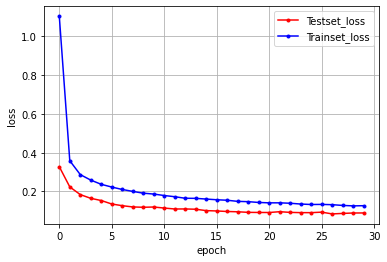

In [33]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c= 'r', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c= 'b', label = 'Trainset_loss')

plt.legend(loc ='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()